In [1]:
from os import path
from scipy.ndimage import imread
from IPython.display import display

from visualization import Context
from visualization.visualizers.input import MahendranEtAlVisualizer
from visualization.visualizers import as_image

In [2]:
# !cd ../models && wget https://storage.googleapis.com/download.tensorflow.org/models/inception5h.zip && unzip inception5h.zip && cd ../notebooks

In [3]:
context = Context(path.join('..', 'models', 'tensorflow_inception_graph.pb'))

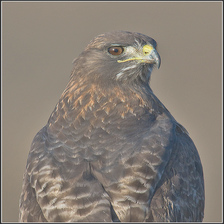

In [4]:
input_image_path = path.join('..', 'resources', 'eagle.jpg')
input_image = imread(input_image_path)
display(as_image(input_image))

import/maxpool0:0
Iteration: 0 => Score: -19404.2890625
Iteration: 25 => Score: -205666.828125
Iteration: 50 => Score: -28064602.0
Iteration: 75 => Score: -2778004224.0


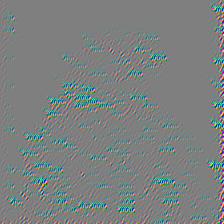

import/mixed3a:0
Iteration: 0 => Score: -100.1673355102539
Iteration: 25 => Score: -64.66853332519531
Iteration: 50 => Score: -66.13794708251953
Iteration: 75 => Score: -89.61831665039062


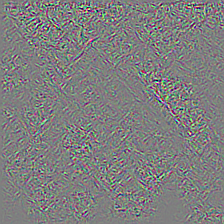

import/mixed4e:0
Iteration: 0 => Score: -6.392165184020996
Iteration: 25 => Score: -0.4749593138694763
Iteration: 50 => Score: -1.8959941864013672
Iteration: 75 => Score: -0.2862863838672638


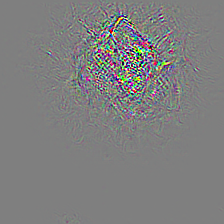

In [5]:
tensors = [
    ('maxpool0:0', 20),
    ('mixed3a:0', 188),
    ('mixed4e:0', 3)
]

mahendranetal_visualizer = MahendranEtAlVisualizer(context, l2_decay_weight=2e-1, total_variation_weight=5e-1)
     
for t, i in tensors:
    reconstruction = mahendranetal_visualizer.reconstruct_input(
        tensor_name=t,
        channel_index=i,
        input_image=input_image,
        iterations=100,
        step=100.0,
        log_per=25
    )
    display(as_image(reconstruction, size=[224, 224]))